# DS 3000 - Assignment [10]

**Student Name**: [Brian Wong]

**Date**: [3/18/2025]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

load the data directly from the URL into a DataFrame.

In [3]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K")

## Question 2: (10 pts) Data Prep & EDA

Prepare the data for analysis. Ensure that you address the following:
- Perform EDA using the dataset to demonstrate patterns.
- Handle any missing data and invalid data. Justify your approach.
- Plot a histogram of the birth weight and explain the overall distribution. 

In [5]:
# view sample of the data
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [6]:
# Look for info about data types
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [7]:
# Handle missing values
df['gestation'] = df['gestation'].fillna(df['gestation'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())

# Convert to categorical
df['smoke'] = df['smoke'].astype('category')
df['parity'] = df['parity'].astype('category')

# Handle missing values for categorical variables
df['smoke'] = df['smoke'].fillna(df['smoke'].mode()[0])

df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   case       1236 non-null   int64   
 1   bwt        1236 non-null   int64   
 2   gestation  1236 non-null   float64 
 3   parity     1236 non-null   category
 4   age        1236 non-null   float64 
 5   height     1236 non-null   float64 
 6   weight     1236 non-null   float64 
 7   smoke      1236 non-null   category
dtypes: category(2), float64(4), int64(2)
memory usage: 60.7 KB


I decided to perform imputation on the variables with missing and invalid data because they were missing only a few 
values. I imputated the missing and invalid data in the variables gestation, age, height, and weight with their median
because the mean might be skewed, so median might be a better choice. 


For the variable smoke, I converted it to categorical since the values are either 1 or 0 to represent smoking or not smoking. 
I then imputated the missing and invalid data with the mode since it was missing few values and is categorical.

I also converted parity to categorical since the values are either 1 or 0 to indicate for a first pregnancy.

In [9]:
# Statistical Summary
df.describe()

,case,bwt,gestation,age,height,weight
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,618.500000,119.576861,279.345469,27.253236,64.046926,128.520227
std,356.946775,18.236452,15.943257,5.776943,2.510751,20.672940
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,309.750000,108.750000,272.000000,23.000000,62.000000,115.000000
50%,618.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,927.250000,131.000000,288.000000,31.000000,66.000000,138.000000
max,1236.000000,176.000000,353.000000,45.000000,72.000000,250.000000


Each variable has the same count, so they all have the same amount of data. 

All the variables' mean are also close to the median, which means the distribution is roughly a normal distribution.

For the bwt variable, it has a standard deviation of 18, which isn't that high, so it doesn't have a wide spread.
This is also true for the variables gestation, age, height, and weight.

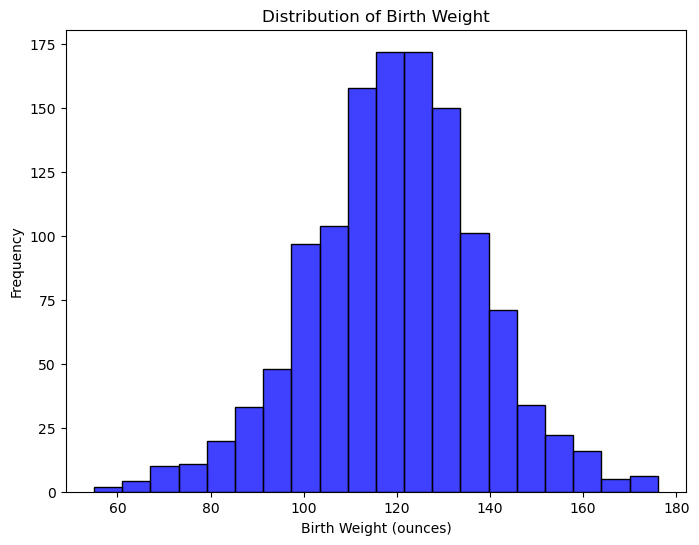

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['bwt'], bins=20, color='blue')

# Labels and title
plt.xlabel('Birth Weight (ounces)')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Weight')

plt.show()

The overall distribution of the birth weight is roughly a normal distribution where it is centered around 120 ounces 
with a frequency of about 170. It also has tails of birth weights at about 55 ounces on the lower end and 175 
ounces at the upper end.

## Question 3: (5 pts) Feature Selection

Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected.  Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
- Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
- Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

In [14]:
# Check correlations between bwt and continuous features using the Pearson Correlation

# Calculate correlations
correlation_matrix = df.corr()

# Display correlation of each feature with 'bwt'
print(correlation_matrix['bwt'].sort_values(ascending=False))

bwt          1.000000
gestation    0.405773
height       0.197261
weight       0.151979
age          0.033668
parity      -0.046107
case        -0.057643
smoke       -0.240617
Name: bwt, dtype: float64


A value of 1.00 means there is a perfect correlation with the variable bwt. The variable with the closest
Pearson correlation coefficient to 1.00 other than bwt is gestation with a value of 0.41 which indicates
a moderate positive correlation between gestation and bwt, so as gestation increases, bwt also increases, but
not in a perfect relationship.

The rest of the variables have a weak correlation with bwt, so the only continuous feature I will be 
selecting is gestation.

In [16]:
# Check correlations between bwt and categorical features using Hypothesis Testing

from scipy import stats

alpha = 0.05

# For the smoking variable (smokers vs non-smokers)
smokers = df[df['smoke'] == 1]['bwt']
non_smokers = df[df['smoke'] == 0]['bwt']
t_stat, p_value_smoke = stats.ttest_ind(smokers, non_smokers)

# Check if p-value is less than or equal to 0.05
if p_value_smoke <= alpha:
    print(f"Smoking: The result is statistically significant (p-value = {p_value_smoke})")
else:
    print(f"Smoking: The result is not statistically significant (p-value = {p_value_smoke})")

# For the parity variable (parity = 0 vs parity = 1)
one_parity = df[df['parity'] == 1]['bwt']
zero_parity = df[df['parity'] == 0]['bwt']
t_stat, p_value_parity = stats.ttest_ind(one_parity, zero_parity)

# Check if p-value is less than or equal to 0.05
if p_value_parity <= alpha:
    print(f"Parity: The result is statistically significant (p-value = {p_value_parity})")
else:
    print(f"Parity: The result is not statistically significant (p-value = {p_value_parity})")

Smoking: The result is statistically significant (p-value = 9.730641848848603e-18)
Parity: The result is not statistically significant (p-value = 0.1051864939793519)


The p-value for the t-test of smoking is extremely small or around 0.00, which is less than the signfiicance level of 0.05,
which indicates that there is a statistically significant difference between the bwt of smokers and non-smokers. Therefore,
I will choose the feature smoke as one of the features to build the model. 

The p-value of parity is 0.11, which indicates that there isn't a statistically significant difference between the bwt and
parity = 1 and parity = 0, so I will not use parity as a feature to build the model.

## Question 4: Data Partitioning (2 pts)

Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.

In [19]:
from sklearn.model_selection import train_test_split

X   = df[['gestation', 'smoke']] #get the input features
y   = df['bwt']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Question 5: Model Development (3 pts)

Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.  
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

The target is bwt which is a continuous numerical value, so I chose the random froest regressor.

## Question 6: Model Evaluation (2 pts)

Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

#predict the labels for the test set
y_pred   = rf.predict(X_test)

min_pred = np.min(y_pred).round(2)
max_pred = np.max(y_pred).round(2)

print(f"Min prediction: {min_pred}, Max prediction: {max_pred}")

median_pred = np.median(y_pred).round(2)
print("The median is: {}".format(median_pred))

mean_pred = np.mean(y_pred).round(2)
print("The mean is: {}".format(mean_pred))

print('The predicted bwt is: {}'.format(y_pred))

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred).round(2)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

Min prediction: 71.65, Max prediction: 142.67
The median is: 120.43
The mean is: 119.2
The predicted bwt is: [119.11579942 124.14009823 124.14009823 120.33022426 128.73
 125.28617974 123.18813333 121.26311192 123.27435351 117.711547
 135.58553629 111.79634973 118.89832952 141.03017063 135.58553629
 122.13139408 119.11579942 118.06297755 128.58291708 126.88469311
 113.81937937 125.28617974 124.22257848 132.79974396 116.11
 125.28617974 100.21       120.33022426 121.26903211 136.05729221
 136.05729221 101.35977381 117.711547   123.27435351 103.74266667
 140.00854762 132.05585743 116.51115494 114.77892329  88.63483333
 135.58553629 125.28617974 132.79974396 118.06297755 109.94907175
 116.57753577 116.57753577 116.51115494 116.57753577  94.10028999
 113.60551204 111.79634973 102.82007143 114.01021407 134.13131313
 117.40730679 116.51115494 121.06922131 131.1185     105.15459205
 132.01718019 116.57753577 100.21       100.21       102.754
 121.26311192 132.15073629 134.13131313 132.01718019

Based on the predicted values of the model, the median predicted value is 120.57, which is similar
to the median of the actual values but slightly higher, and the mean is 119.19, which is also slightly
higher than the actual mean. The minimum predicted value is 71.18 and the maximum predicted value is
142.07, so the predicted minimum is greater than the actual minimum value and the predicted maximum 
is smaller than the actual maximum value, so the model isn't good at predicting values at the extreme ends.

The mean squared error of the model is 285.16, so around when taken the square root, it is 16.89 ounces off of the
actual values in either the positive or negative direction. This means the model is doing okay since it is close to
zero and is not that large relative to the birth weights, which implies the model has room for improvement, 
but isn't far off from being good.

## Question 7: Model Tuning (10 pts)

What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight? Justify your response.
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
- Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation**Links to an external site. to learn more about this algorithm and its parameters. Try at least 10 different values for the n_estimators parameter (excluding the default value) to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
- Indicate which model performed the best.

Based on the evaluation of the model's predictions, I think the model's prediction capability is okay since it has a mean
squared error of 285.16 or around 16.89 ounces when taken the square root, which is close to zero, so the predictions are
close to the actual values. I also think it did a good job of predicting
birth weights because most of the predicted values were similar to the median of the actual values.

The model could be tuned to try and reduce the mean squared error to have a better prediction capability.

In [28]:
# Originally used default (100) above, so try doubling
n_estimator = 200

rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # Resulted in 286.75, which is greater than origianl of 285.16, so try lower

n_estimator = 50

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # Resulted in 284.26, which is lower than original, so getting better

n_estimator = 75

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # mean square error (MSE) is getting larger, so try smaller

n_estimator = 25

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE getting smaller, try smaller

n_estimator = 20

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE getting smaller, try smaller

n_estimator = 17

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE getting smaller, try smaller

n_estimator = 16

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE getting bigger. Test values bigger than 100

n_estimator = 150

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE bigger than original, try smaller

n_estimator = 125

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE slightly larger than original, try smaller

n_estimator = 120

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse) # MSE slightly larger than original

286.750028682546
284.26257154018214
285.09033268688574
283.60091495256466
282.96919737063615
282.5116091876322
283.8824655482682
286.3266723401752
285.3638102113416
285.4048153718224


In [29]:
# Best performing model
n_estimator = 17

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

min_pred = np.min(y_pred).round(2)
max_pred = np.max(y_pred).round(2)

print(f"Min prediction: {min_pred}, Max prediction: {max_pred}")

Min prediction: 72.79, Max prediction: 144.13


The model that performed the best was the model with a value of 17 for the n_estimators as it has the lowest
mean square error of 282.51, which is even lower than the original model's mean square error of 285.16.
Since the mean square error is lower than the original model's mean square error, it will make predictions
more accurate, which would makes this model perform the best out of all tested models. Also, this model isn't
able to predict minimum values very well, similar to the original model, but it does slightly predict maximum
values better than the original model as this model has a maximum prediction of 144.13 compared to the original's 142.07.

## Question 8: (15 pts) 

Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 10 different values of k (ensure that you do not arbitrarily choose k). Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best. 

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Perform step 5
k = 100
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) 

277.88276334231807


In [33]:
# Perform step 6

#predict the labels for the test set
y_pred = knn.predict(X_test)

min_pred = np.min(y_pred).round(2)
max_pred = np.max(y_pred).round(2)

print(f"Min prediction: {min_pred}, Max prediction: {max_pred}")

print('The predicted bwt is: {}'.format(y_pred))

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred).round(2)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

Min prediction: 102.18, Max prediction: 129.38
The predicted bwt is: [119.   123.5  123.5  119.52 126.78 119.8  124.81 116.46 122.1  119.42
 129.38 112.16 113.44 128.83 129.38 126.26 119.   118.4  127.93 128.35
 110.33 119.8  127.6  128.58 126.7  119.8  102.86 119.52 110.05 128.42
 128.42 109.86 119.42 122.1  102.89 128.72 126.52 121.24 110.44 103.27
 129.38 119.8  128.58 118.4  117.18 115.62 115.62 121.24 115.62 109.47
 118.65 112.16 108.93 119.15 128.55 128.31 121.24 119.91 126.58 111.
 128.93 115.62 102.86 102.86 103.11 116.46 129.16 128.55 128.93 119.8
 128.22 122.1  122.1  116.46 119.1  118.65 124.81 116.41 119.52 127.6
 108.02 119.8  128.72 116.46 108.93 104.35 126.58 128.55 117.48 121.24
 119.   128.51 109.59 105.06 124.81 128.93 110.81 119.52 113.   124.81
 119.8  126.74 117.48 118.4  128.65 128.55 103.81 129.38 113.   126.65
 128.31 128.31 129.11 128.58 128.58 109.59 116.41 117.48 128.93 116.46
 110.05 119.19 119.15 113.44 119.52 108.52 108.52 122.1  119.1  122.1
 128.58 128.6

Based on the predicted values of the model, the median predicted value is 120.35, which is similar
to the median of the actual values but slightly higher, and the mean is 119.46, which is also slightly
higher than the actual mean. The minimum predicted value is 94.18 and the maximum predicted value is
133.00, so the predicted minimum is greater than the actual minimum value and the predicted maximum 
is smaller than the actual maximum value, so the model isn't good at predicting values at the extreme ends.

The mean squared error of the model is 273.42, so around when taken the square root, it is 16.54 ounces off of the
actual values in either the positive or negative direction. This means the model is doing okay since it is close to
zero and is not that large relative to the birth weights, which implies the model has room for improvement, 
but isn't far off from being good.

In [35]:
# Perform step 7

k = 865
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a higher MSE, try lower k

k = 500
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a lower MSE, try lower k

k = 250
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a lower MSE, try lower k

k = 125
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a lower MSE, try lower k

k = 50
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a lower MSE, try lower k

k = 40
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a lower MSE, try lower k

k = 30
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a higher MSE, try higher k

k = 35
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a lower MSE, try lower k

k = 33
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a higher MSE, try higher k

k = 34
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse) # This gave a higher MSE

335.92847050148066
293.00388715902966
280.08283941778967
276.1731683018868
273.6535029649596
270.4392099056604
274.45006888289913
273.1931811430772
273.2163660619922
273.52475307548104


In [36]:
# Best Performing Model

k = 40
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
min_pred = np.min(y_pred).round(2)
max_pred = np.max(y_pred).round(2)

print(f"Min prediction: {min_pred}, Max prediction: {max_pred}")

Min prediction: 94.48, Max prediction: 132.98


The model that performed the best was the model with a k value of 40 for the n_neighbors as it has the lowest
mean square error of 270.44, which is even lower than the original model's mean square error of 273.52.
Since the mean square error is lower than the original model's mean square error, it will make predictions
more accurate, which would makes this model perform the best out of all tested models. Also, this model isn't
able to predict minimum or maximum values very well, similar to the original model, since the minimum and maximum
values predicted aren't as extreme as the original data's minimum and maximum values.

## Question 9: (3 points)

Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

The best model from the Random Forest algorithm had a mean squared error of 282.51 and was able to have a minimum prediction
of 72.79 and a maximum prediction of 144.13. The best model from the k-NN algorithm had a mean squared error of 273.52 and
was able to have a minimum prediction of 94.48 and a maximum prediction of 132.98.

The best model from the k-NN algorithm had a lower mean squared error than the best model from the Random Forest algorithm,
so it predicts values more accurately. However, the difference between the square root of the mean squared errors is only
0.27 ounces, which isn't much. More importantly, the best model from the Random Forest algorithm was able to predict a wider
range of birth weights compared to the best model from the k-NN algorithm's smaller range of birth weights by a large margin.
Thus, I believe the best model from the Random Forest algorithm is the most suitable to predict birthweights
because the mean squared errors are similar, but the best model from the Random Forest algorithm has a wider range of
predictions.

## Question 10: (+5 bonus points)

The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

gestation: 0.90
smoke: 0.10


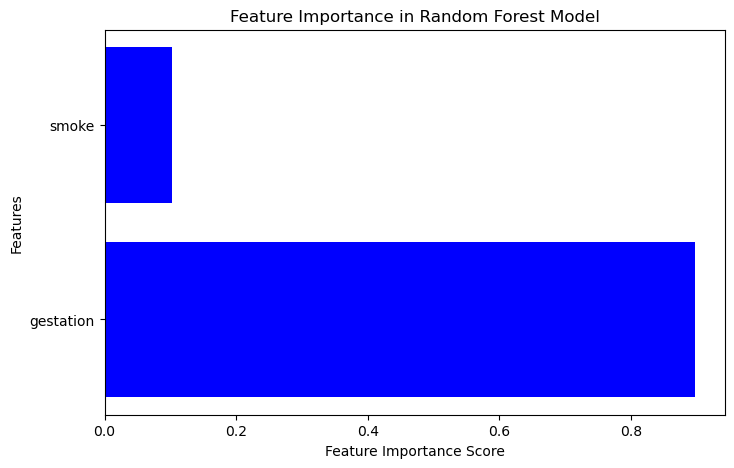

In [41]:
# Best model
n_estimator = 17

rf = RandomForestRegressor(n_estimators=n_estimator, random_state=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Print feature importance scores
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.2f}")

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

In the best model--the Random Forest Model with n_estimator of 17--the features that helped make the predictions were
gestation and smoke as seen on the y-axis of the bar graph labled "Feature Importance in Random Forest Model". The feature
smoke had a feature importance score of 0.10 and the feature gestation had a feature importance score of 0.90, so 
gestation was the most important feature when making predictions.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
